# Sales Analysis

### Solving real-world data science tasks - from Keith Galli
### https://www.youtube.com/watch?v=eMOA1pPVUc4

<i>I did this project to practice my Python skills. I wanted to work with a large database and also practice solving sales data analysis problems. My approach was to try to solve the problems using my code, and when I got stuck, I used what the video showed; this is also practice.
I will try to create and answer my questions and use the data to practice with Tableau. </i>

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

### 2. Merging 12 months of data into a single file

<p>We have 12 months of data, and to work with all of it, we are going to <u>merge</u> the files into a single one. We open all the files and then merge them into a variable. Then we save the data into a .csv file.</p>

In [2]:
# Merging the data
df_2019 = pd.concat(
    map(pd.read_csv, ['../sales_analysis/csv_files/Sales_January_2019.csv', 
                    '../sales_analysis/csv_files/Sales_february_2019.csv', 
                    '../sales_analysis/csv_files/Sales_March_2019.csv', 
                    '../sales_analysis/csv_files/Sales_April_2019.csv', 
                    '../sales_analysis/csv_files/Sales_May_2019.csv', 
                    '../sales_analysis/csv_files/Sales_June_2019.csv', 
                    '../sales_analysis/csv_files/Sales_July_2019.csv', 
                    '../sales_analysis/csv_files/Sales_August_2019.csv', 
                    '../sales_analysis/csv_files/Sales_September_2019.csv', 
                    '../sales_analysis/csv_files/Sales_October_2019.csv', 
                    '../sales_analysis/csv_files/Sales_November_2019.csv', 
                    '../sales_analysis/csv_files/Sales_December_2019.csv']), ignore_index = True)

# print(df_2019)
df_2019.info()
# Create a csv file with the merged data
df_2019.to_csv('SalesData_2019.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


<p>Merging the data by using <b>os.path.join</b></p>

In [3]:
import os

# We create a list with all the files
filesList = [ file for file in os.listdir('./csv_files/')]

# Checking if filesList works correctly
for file in filesList:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
# First lets create our DataFrame
all_data_2019 = pd.DataFrame()

# Now we loop trough filesList
for file in filesList:
    df = pd.read_csv('./csv_files/'+file)
    all_data_2019 = pd.concat([all_data_2019, df])
    
# checking if the data merge correctly
all_data_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [5]:
# Create a csv file with the merged data
# all_data_2019.to_csv('SalesData_2019.csv', index=False)

### 3. Working with our new DataFrame

<p>It's time to work with our data frame. We will start exploring and cleaning the data. For future analysis, we need to check that the data types are correct and that we don´t have <i>NaN or null values</i></p>

In [6]:
df_all_data = pd.read_csv('SalesData_2019.csv')
df_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### 3.1 Explore the dataframe

<p>Checking the column names we are working with.</p>


In [7]:
df_all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

<p>We are dropping all <i>NaN or null values</i>. We can also count how many NaN or null values we have to acknowledge if we are missing a lot of data.</p>

In [8]:
df_all_data.dropna(axis=0, inplace=True)
df_all_data

# Searching for NaN or null values in 'Product' column
# missing_values = df_all_data['Product'].isnull().sum()
# print("Number of missing values: ", missing_values)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


<p>We will use the .unique() method to search for values that are not corresponding to the data that is needed. For example, we are going to work with the 'Order Date' column so we expect day and hour data type values, with the .unique() method we ensure all the values in the column are date type.</p>

In [9]:
df_all_data['Order Date'].unique()

array(['01/22/19 21:25', '01/28/19 14:15', '01/17/19 13:33', ...,
       '12/01/19 12:01', '12/09/19 06:43', '12/03/19 10:39'], dtype=object)

<p>Using a <u>for loop</u> to convert the data into datetime data type, if the data can not be converted, we will append the index into an array and then delete it.</p>

In [10]:
# If some data cannot be converted to_datetime we will search for them and delete it
invalid_index = []
for index, value in df_all_data['Order Date'].items():
    try:
        pd.to_datetime(value)
    except ValueError:
        invalid_index.append(index)
        # print(f"Invalid date format at index {index}: {value}")
        # print(invalid_index)

df_all_data.drop(invalid_index, inplace=True)
print(df_all_data)        


       Order ID                     Product Quantity Ordered Price Each  \
0        141234                      iPhone                1        700   
1        141235    Lightning Charging Cable                1      14.95   
2        141236            Wired Headphones                2      11.99   
3        141237            27in FHD Monitor                1     149.99   
4        141238            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   319666    Lightning Charging Cable                1      14.95   
186846   319667       AA Batteries (4-pack)                2       3.84   
186847   319668             Vareebadd Phone                1        400   
186848   319669            Wired Headphones                1      11.99   
186849   319670  Bose SoundSport Headphones                1      99.99   

            Order Date                        Purchase Address  
0       01/22/19 21:25         944

<p>Once the data is converted to datetime type, now we separate the data into 'Month', 'Hour', and 'Minute' and store it in three new columns with their corresponding name.</p>

In [11]:
# Add month column and split the dates
df_all_data['Order Date']  = pd.to_datetime(df_all_data['Order Date'])

# Extract and add month and hour into separate columns
month = df_all_data['Order Date'].dt.month
hour = df_all_data['Order Date'].dt.hour
minute = df_all_data['Order Date'].dt.minute

# Get the index of 'Order Date' column
order_index = df_all_data.columns.get_loc('Order Date')

# Insert the new columns next to 'Order Date'
df_all_data.insert(order_index + 1, 'Month', month)
df_all_data.insert(order_index + 2, 'Hour', hour)
df_all_data.insert(order_index + 3, 'Mintue', minute)

# Drop the intermediate 'Month' and 'Hour' columns if necessary
# df_all_data.drop(['Month', 'Hour'], axis=1, inplace=True)

df_all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Hour,Mintue,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,1,21,25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,1,14,15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,1,13,33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,1,20,33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,1,11,59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,12,20,58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,12,12,1,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,12,6,43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,12,10,39,"778 River St, Dallas, TX 75001"


In [12]:
df_all_data['Price Each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', '700.0', '150.0', '300.0', '1700.0',
       '400.0'], dtype=object)

In [13]:
# Checking if there are any NaN values in our data
nan_rows = df_all_data[df_all_data.isna().any(axis=1)]
nan_rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Hour,Mintue,Purchase Address


<p>We made a <b>double-check</b> for NaN or null values. Now that the data is clean, we can start with our analysis</p>

#### <b><u>Question 1:</u></b> What was the best month for sales? How much was earned that month?

<p>We need to <u>break down</u> our problem into <i>small pieces</i>. First, we need to multiply the values from column <i>'Quantity Ordered'</i> with the values from <i>'Price Each'</i>. Let's store the new values in a new column called <i>'Sold'</i>.</p>

<p>Before doing our calculations, <u>let's check the data types are correct</u></p>

In [14]:
# Checking if 'Quantity Ordered' has integer values as data type
df_all_data['Quantity Ordered'].dtypes
df_all_data['Quantity Ordered'] = df_all_data['Quantity Ordered'].astype(int)
df_all_data['Quantity Ordered'].dtypes

dtype('int32')

In [15]:
# Checking if 'Price Each' has float values as data type
df_all_data['Price Each'].dtypes
df_all_data['Price Each'] = df_all_data['Price Each'].astype(float)
df_all_data['Price Each'].dtypes

dtype('float64')

In [16]:
# We can also use pd.to_numeric to convert our data type to numeric values
# df_all_data['Quantity Ordered'] = pd.to_numeric(df_all_data['Quantity Ordered'])
# df_all_data['Price Each'] = pd.to_numeric(df_all_data['Price Each'])

<p>Now that our data types are correct, we can start with the calculations</p>

In [17]:
# Remember we are going to put the new values into a new column named 'Sold'
df_all_data['Sold'] = df_all_data['Quantity Ordered'] * df_all_data['Price Each']
df_all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Hour,Mintue,Purchase Address,Sold
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,1,21,25,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,1,14,15,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,1,13,33,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,1,20,33,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,1,11,59,"387 10th St, Austin, TX 73301",11.99
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,12,20,58,"14 Madison St, San Francisco, CA 94016",14.95
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,12,12,1,"549 Willow St, Los Angeles, CA 90001",7.68
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,12,6,43,"273 Wilson St, Seattle, WA 98101",400.00
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,12,10,39,"778 River St, Dallas, TX 75001",11.99


In [18]:
# We use group by to group the data by month, also we will storage in a variable
best_month = df_all_data.groupby('Month').sum()
print(best_month)

       Quantity Ordered  Price Each    Hour  Mintue        Sold
Month                                                          
1                 10903  1811768.38  139485  282440  1822256.73
2                 13449  2188884.72  172669  354885  2202022.42
3                 17005  2791207.83  218969  447559  2807100.38
4                 20558  3367671.02  262259  544186  3390670.24
5                 18667  3135125.13  238780  487899  3152606.75
6                 15253  2562025.61  195528  402436  2577802.26
7                 16072  2632539.56  206169  417349  2647775.76
8                 13448  2230345.42  172289  353857  2244467.88
9                 13109  2084992.09  168513  341698  2097560.13
10                22703  3715554.83  290650  598437  3736726.88
11                19798  3180600.68  254865  518231  3199603.20
12                28114  4588415.41  359978  733082  4613443.34


C:\Users\imgal\AppData\Local\Temp\ipykernel_14636\1279158204.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_month = df_all_data.groupby('Month').sum()


<p>Importing Matplotlib to visualize the data</p>

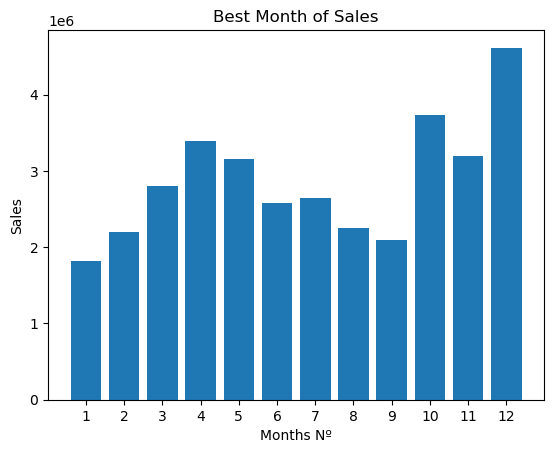

In [19]:
import matplotlib.pyplot as plt

# Creating a range for the months
months = range(1,13)

# The plot
plt.bar(months, best_month['Sold'])
plt.xticks(months)
plt.xlabel('Months Nº')
plt.ylabel('Sales')
plt.title('Best Month of Sales')
plt.show()

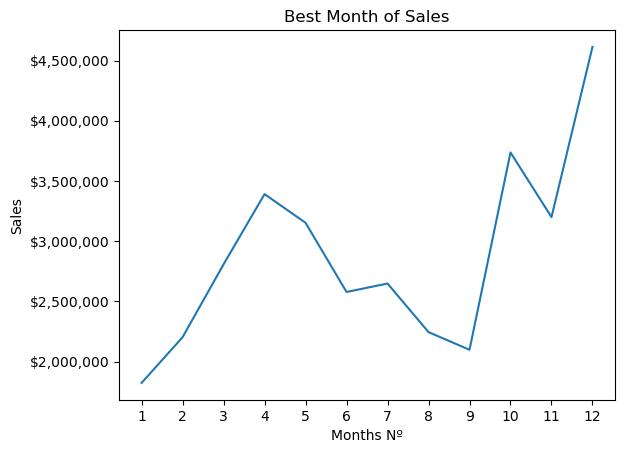

In [20]:
import matplotlib.ticker as ticker

# Creating a range for the months
months = range(1,13)

# The plot
plt.plot(months, best_month['Sold'])
plt.xticks(months)
plt.xlabel('Months Nº')
plt.ylabel('Sales')
plt.title('Best Month of Sales')

# Formatting the y-axis labels
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))  # Format as currency
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

<p>Looking at the data and then at the charts we can say that December was the month with the most sales. The online store registered a high in sales till April, then the sales started to decrease, registering September as the month with the lowest sales. By then the sales started to go up again, this increase may have been motivated by the holiday sales of BlackFriday and Christmans.</p>

#### <b><u>Question 2:</u></b> What city has the highest number of sales?

<p>To answer this question we are going to use the 'Purchase Address' column. First, we need to ensure that we are working with <u>string values</u>. Second, we will <u>split</u> the strings to only use the names of the cities. We can also use the state code</p>

In [21]:
# Checking if we have string values in the 'Purchase Address' column

df_all_data['Purchase Address'].dtype
df_all_data['Purchase Address'].unique()
# df_all_data['Purchase Address'] = df_all_data['Purchase Address'].map(str)
# df_all_data['Purchase Address']


array(['944 Walnut St, Boston, MA 02215',
       '185 Maple St, Portland, OR 97035',
       '538 Adams St, San Francisco, CA 94016', ...,
       '273 Wilson St, Seattle, WA 98101',
       '778 River St, Dallas, TX 75001',
       '747 Chestnut St, Los Angeles, CA 90001'], dtype=object)

In [22]:
# Checking and deleting NaN values.
invalid_nan = []
for index, value in df_all_data['Purchase Address'].items():
    if pd.isnull(value):
        invalid_nan.append(index)
        
print(invalid_nan)

# all_data_2019.dropna(subset=['Purchase Address'], inplace=True)

[]


<p>Once we are sure we don´t have any NaN or null values, and the data type is <u>string</u>, we will split the string values to extract the cities and the state codes, this is because we can have cities with same names but they are from different states.</p>

In [23]:
# Now let's split the values to extract only the city names
# Splitting the values and store them into a variable
extract_city_data = df_all_data['Purchase Address'].str.split(', ', expand=True)
states = extract_city_data[2].str.split(' ').str[0]
city_states = extract_city_data[1] + ' (' + states + ')'
# print(city_states)

# Split again the values into the variable and store them in the new column 'City'
df_all_data['City'] = city_states

# Checking if the values are correct
df_all_data['City']

0                Boston (MA)
1              Portland (OR)
2         San Francisco (CA)
3           Los Angeles (CA)
4                Austin (TX)
                 ...        
186845    San Francisco (CA)
186846      Los Angeles (CA)
186847          Seattle (WA)
186848           Dallas (TX)
186849      Los Angeles (CA)
Name: City, Length: 185950, dtype: object

<p>Now that we have the city names is time to answer to our second question</p>

In [24]:
cities_sales = df_all_data.groupby('City').sum()
print(cities_sales)

                    Quantity Ordered  Price Each   Month    Hour   Mintue  \
City                                                                        
Atlanta (GA)                   16602  2779908.20  104794  214264   442932   
Austin (TX)                    11153  1809873.61   69829  141946   289060   
Boston (MA)                    22528  3637409.77  141112  288225   590442   
Dallas (TX)                    16730  2752627.82  104620  214390   435155   
Los Angeles (CA)               33289  5421435.23  208325  427444   866638   
New York City (NY)             27932  4635370.83  175741  357696   733598   
Portland (ME)                   2750   447189.25   17144   35211    72856   
Portland (OR)                  11303  1860558.22   70621  144421   295533   
San Francisco (CA)             50239  8211461.74  315520  643265  1319477   
Seattle (WA)                   16553  2733296.01  104941  213292   436368   

                          Sold  
City                            
Atlanta (

C:\Users\imgal\AppData\Local\Temp\ipykernel_14636\3589394245.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cities_sales = df_all_data.groupby('City').sum()


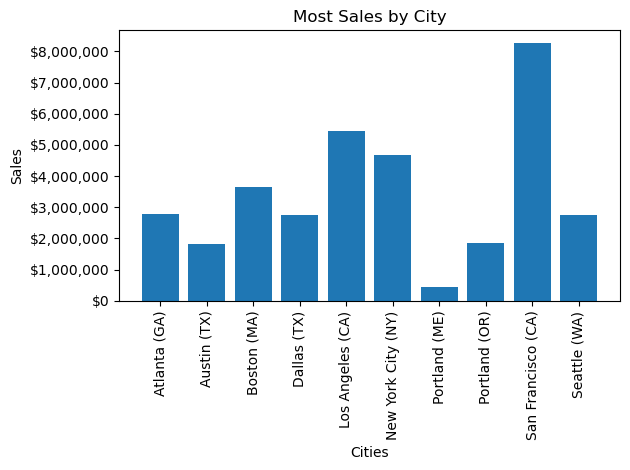

In [25]:
# Creating a range for the cities
cities = cities_sales.index
sales = cities_sales['Sold']
cities_range = range(len(cities))
# print(cities)

# The plot
plt.bar(cities, cities_sales['Sold'])
plt.xticks(cities_range, cities, rotation="vertical")
# plt.yticks(rotation=45)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.title('Most Sales by City')

# Formatting the y-axis labels
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))  # Format as currency
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

<p>We can say that the city with the most sales is <b><i>San Francisco</i></b> with a total of $8.262.203.91 sales, followed by <b><i>Los Angeles</i></b> with a total of $ 5.452.570.80, and in third place, is <b><i>New York</i></b> with a total of $ 4.664.317.43</p>

In [26]:
df_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Hour,Mintue,Purchase Address,Sold,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,1,21,25,"944 Walnut St, Boston, MA 02215",700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,1,14,15,"185 Maple St, Portland, OR 97035",14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,1,13,33,"538 Adams St, San Francisco, CA 94016",23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,1,20,33,"738 10th St, Los Angeles, CA 90001",149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,1,11,59,"387 10th St, Austin, TX 73301",11.99,Austin (TX)


#### <b><u>Question 3</u></b>: What time should we display advertisements to maximize the likelihood of customers buying a product?

<p>To answer this question we are going to need to extract the hours from the 'Order Date' column and try to create a distribution through the 24 hours</p>

In [27]:
hours = [hour for hour, df in df_all_data.groupby('Hour')]
print(hours)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


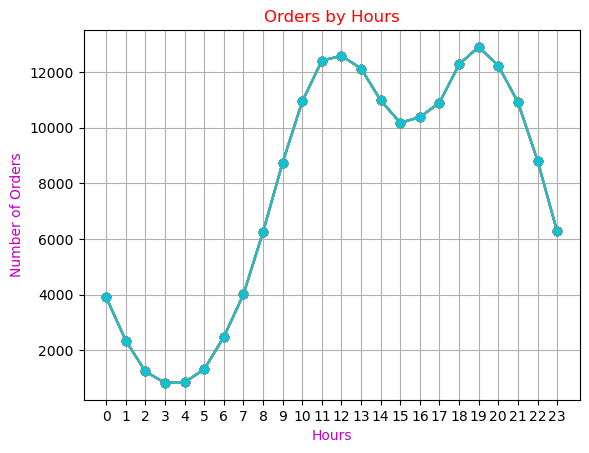

In [28]:
plt.plot(hours, df_all_data.groupby('Hour').count(), marker = 'o')
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours', color='m')
plt.ylabel('Number of Orders', color='m')
plt.title('Orders by Hours', color='red')
plt.show()

<p>Looking at the graph, if we want to maximize advertisements, we recommend posting them at the hours when the peaks of the orders occur, which are from <u><i>11 to 13</i></u>, and from <u><i>18 to 20</i></u>. In those hours when you receive the most orders, so advertising is likely to reach more customers. Also, advertising can be old from <i>11 to 20</i>, because during this period the most orders are registered. </p>

#### <b><u>Question 4</u></b>: What products are most often sold together?

<p>For this question, we will count the products, but also for this task, we will need to know those products that go together in the same direction</p>

In [29]:
# We create a new data frame with the duplicate values
prod_by_id = df_all_data[df_all_data['Order ID'].duplicated(keep=False)]
prod_by_id.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Hour,Mintue,Purchase Address,Sold,City
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,1,16,6,"610 Walnut St, Austin, TX 73301",11.95,Austin (TX)
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,1,16,6,"610 Walnut St, Austin, TX 73301",11.99,Austin (TX)
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,1,8,25,"4 1st St, Los Angeles, CA 90001",150.00,Los Angeles (CA)
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,1,8,25,"4 1st St, Los Angeles, CA 90001",11.52,Los Angeles (CA)
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,1,11,19,"20 Dogwood St, New York City, NY 10001",400.00,New York City (NY)


In [30]:
# Now we 'join' the duplicated values and put them into a new column
grouped =  prod_by_id.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
# grouped.head(10)
prod_by_id['Grouped'] = grouped
prod_by_id.head(10)

C:\Users\imgal\AppData\Local\Temp\ipykernel_14636\605619940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_by_id['Grouped'] = grouped


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Hour,Mintue,Purchase Address,Sold,City,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,1,16,6,"610 Walnut St, Austin, TX 73301",11.95,Austin (TX),"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,1,16,6,"610 Walnut St, Austin, TX 73301",11.99,Austin (TX),"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,1,8,25,"4 1st St, Los Angeles, CA 90001",150.00,Los Angeles (CA),"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,1,8,25,"4 1st St, Los Angeles, CA 90001",11.52,Los Angeles (CA),"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,1,11,19,"20 Dogwood St, New York City, NY 10001",400.00,New York City (NY),"Vareebadd Phone, Wired Headphones"
134,141365,Wired Headphones,1,11.99,2019-01-10 11:19:00,1,11,19,"20 Dogwood St, New York City, NY 10001",11.99,New York City (NY),"Vareebadd Phone, Wired Headphones"
153,141384,Google Phone,1,600.00,2019-01-03 00:14:00,1,0,14,"223 Jackson St, Boston, MA 02215",600.00,Boston (MA),"Google Phone, USB-C Charging Cable"
154,141384,USB-C Charging Cable,1,11.95,2019-01-03 00:14:00,1,0,14,"223 Jackson St, Boston, MA 02215",11.95,Boston (MA),"Google Phone, USB-C Charging Cable"
220,141450,Google Phone,1,600.00,2019-01-12 11:16:00,1,11,16,"521 Park St, San Francisco, CA 94016",600.00,San Francisco (CA),"Google Phone, Bose SoundSport Headphones"
221,141450,Bose SoundSport Headphones,1,99.99,2019-01-12 11:16:00,1,11,16,"521 Park St, San Francisco, CA 94016",99.99,San Francisco (CA),"Google Phone, Bose SoundSport Headphones"


In [31]:
# Let's remove those values that are not necessary to our analysis
prod_by_id = prod_by_id[['Order ID', 'Grouped']].drop_duplicates()
prod_by_id.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"


In [32]:
# It's time to count the values, for this task, we will use two more libraries
from itertools import combinations
from collections import Counter

# To use Counter, we will need to save it into a variable
counter = Counter()

# We use a for loop to count the pair of values from 'Grouped' column
for row in prod_by_id['Grouped']:
    row_list = row.split(', ')
    counter.update(Counter(combinations(row_list, 2)))
    
# Checking our count
for key, value in counter.most_common(8):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160


<p>The purpose of this analysis was to understand the sales and determine which products were most likely to be bought together. This is to help our stakeholders understand their customer purchases and will help them decide if they want to create sales promotions with their products. We appreciate that most purchases are phones with charging cables. If they want, they can establish a promotion for phones, charging cables, or wired headphones</p>

#### <b><u>Question 5</u></b>: What product sold the most? Why do you think it sold the most?

<p>Let's analyze which product sold the most, why was so demanded, and what we can do to ensure stock.</p>

In [33]:
# We will group the data by products and then sum their totals.
group_prod = df_all_data.groupby('Product').sum()
group_prod

C:\Users\imgal\AppData\Local\Temp\ipykernel_14636\566538657.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_prod = df_all_data.groupby('Product').sum()


,Quantity Ordered,Price Each,Month,Hour,Mintue,Sold
Product,,,,,,
20in Monitor,4129,451068.99,29336,58764,122252,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,90916,184331,2435097.56
27in FHD Monitor,7550,1125974.93,52558,107540,219948,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,89076,183480,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,298342,609039,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,297332,612113,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,223304,455570,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,192445,392603,1345565.43
Flatscreen TV,4819,1440000.00,34224,68815,142789,1445700.00


In [34]:
# We put the values from 'Quantity Ordered' column into a variable, so later we can create our plot
quantity_ordered = group_prod['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

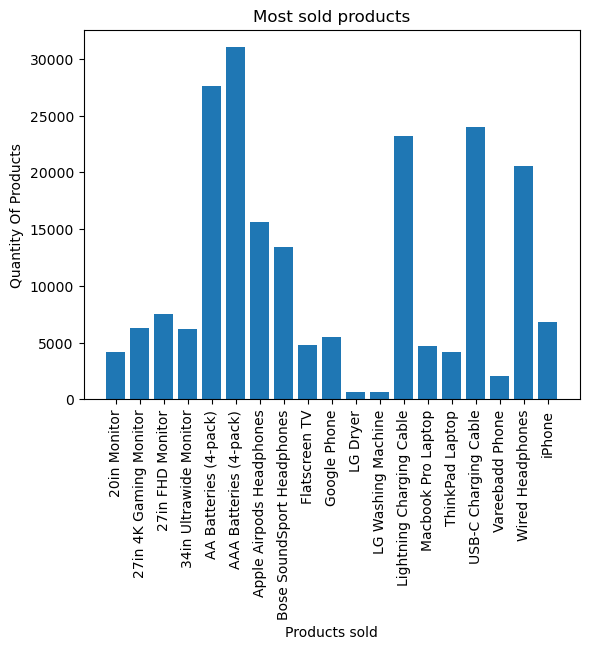

In [35]:
# Let's visualize our data creating a bar plot

xprod = group_prod.index

plt.bar(group_prod.index, quantity_ordered)
plt.xticks(xprod, rotation="vertical")
plt.xlabel('Products sold')
plt.ylabel('Quantity Of Products')
plt.title('Most sold products')
plt.show()

<p>By looking at the values, we can create a hypothesis of why some products are sold most, but it is important to sustain our conclusions with data, so that is what we are going to do now. Batteries are the most popular product, followed by charging cables and headphones. Also, this will help with better stock control.</p>

In [36]:
# We will work with the price of the products and calculate the mean values
prices = df_all_data.groupby('Product').mean()['Price Each']
prices

C:\Users\imgal\AppData\Local\Temp\ipykernel_14636\1170635099.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = df_all_data.groupby('Product').mean()['Price Each']


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<p>With the new data, we will use it to overlay our bar chart</p>

C:\Users\imgal\AppData\Local\Temp\ipykernel_14636\1032566757.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xprod, rotation="vertical")


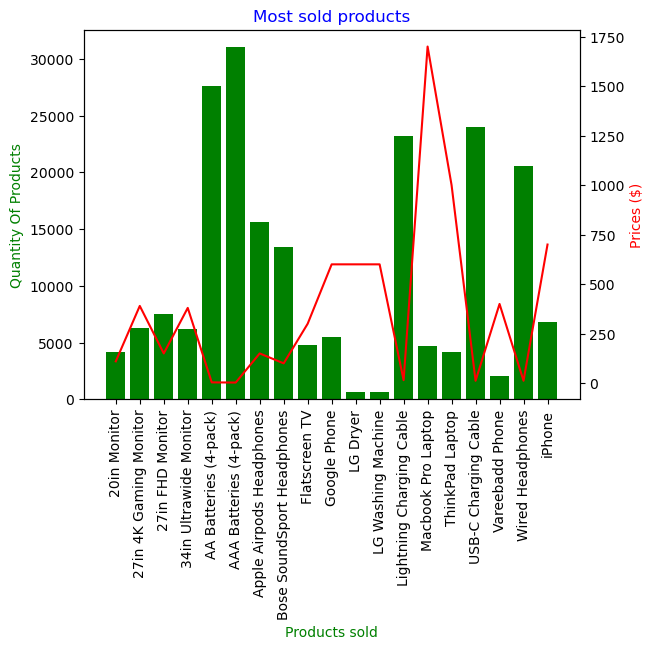

In [37]:
# First we indicate the mix of the plots
fig, ax1 = plt.subplots()

# Create the 2do plot an mix it to the first one
ax2 = ax1.twinx()

ax1.bar(group_prod.index, quantity_ordered, color="green")
ax2.plot(group_prod.index, prices, 'r-')
ax1.set_xticklabels(xprod, rotation="vertical")
ax1.set_xlabel('Products sold', color="green")
ax1.set_ylabel('Quantity Of Products', color="green")
ax1.set_title('Most sold products', color='blue')
ax2.set_ylabel('Prices ($)', color='r')
plt.show()

<p> As we said before, we need to sustain our hypothesis with data, so to our chart for the most sold product, we add the mean of the prices of the products. The lowest prices confirm the most-sold products, and the highest prices show us the products that are sold less. </p>

In [40]:
df_all_data.to_csv('Clean_SalesData_2019.csv', index=False)
df_all_data.to_excel('Clean_SalesData_2019.xlsx', sheet_name='Sales 2019 (Clean)', index=False)

<p>Here you can visit Tableau charts and dashboard:</p> 
<a>https://public.tableau.com/views/Sales_Data_Analysis_17049903648730/Dashboard1?:language=es-ES&publish=yes&:display_count=n&:origin=viz_share_link</a>